<a href="https://colab.research.google.com/github/brianhphillips/testrepo/blob/main/SimpleAnalysis_GoodReads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

path = kagglehub.dataset_download("jealousleopard/goodreadsbooks")
print("Path to dataset files:", path)

100%|██████████| 622k/622k [00:00<00:00, 47.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/jealousleopard/goodreadsbooks/versions/2


In [5]:
csv_file = f"{path}/books.csv"
# Use the 'c' engine and skip bad lines
df = pd.read_csv(csv_file, engine='c', quotechar='"', delimiter=',', on_bad_lines='skip')

In [7]:
# Print the column names to check for typos or variations
print(df.columns)

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')


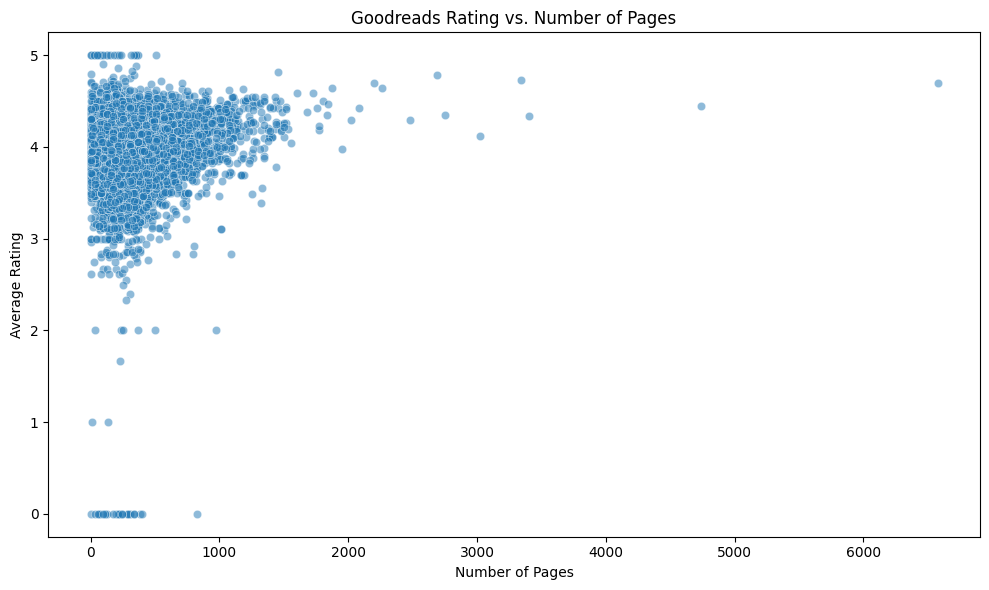

In [12]:
# Based on the output of the above print statement,
# replace 'num_pages' and 'average_rating' in the sns.histplot
# call with the actual column names from your DataFrame.
# For example, if the columns were named 'number_of_pages' and 'rating_average',
# you would change the sns.histplot line to:
# sns.histplot(data=df, x='number_of_pages', hue='rating_average', bins=50, kde=True, palette='Set2', stat='density', common_norm=False)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='  num_pages', y='average_rating', alpha=0.5)
plt.title("Goodreads Rating vs. Number of Pages")
plt.xlabel("Number of Pages")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()

<ipython-input-14-2defe853ac32>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_avg = df.groupby('page_bin')['average_rating'].mean().reset_index()


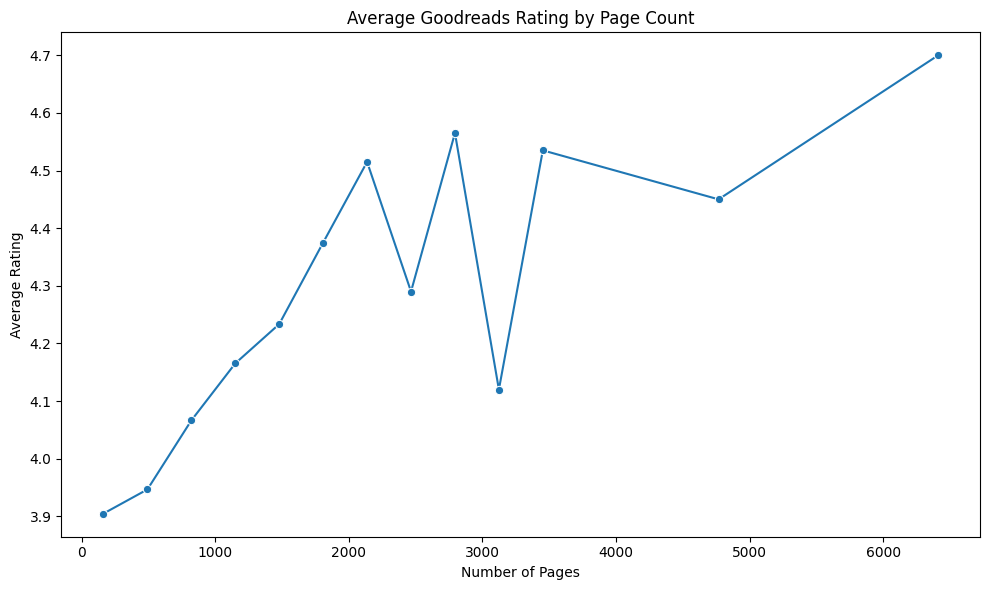

In [14]:
# Bin number of pages
df['page_bin'] = pd.cut(df['  num_pages'], bins=20)

# Group by bins and compute mean rating
bin_avg = df.groupby('page_bin')['average_rating'].mean().reset_index()

# Midpoint of each bin for plotting
bin_avg['bin_center'] = bin_avg['page_bin'].apply(lambda x: x.mid)

plt.figure(figsize=(10, 6))
sns.lineplot(data=bin_avg, x='bin_center', y='average_rating', marker='o')
plt.title("Average Goodreads Rating by Page Count")
plt.xlabel("Number of Pages")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()